# Laboratorio 6 - DS

- Angel Higueros 20460
- Fredy Velasquez 201011

In [1]:
#Imports necesarios
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

In [3]:
!pip install dash


  Using cached dash-2.14.0-py3-none-any.whl (10.4 MB)
  Using cached retrying-1.3.4-py3-none-any.whl (11 kB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl (4.1 kB)
  Using cached ansi2html-1.8.0-py3-none-any.whl (16 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl (3.9 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)


In [5]:
#Bibliotecas para dashboard interactivo
import dash 
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px


## Inciso 3: Limpie y preprocese los datos. Describa de forma detallada las actividades de preprocesamiento 
que llevó a cabo. 
3.1.  Se pueden hacer tareas como: 
- Convertir el texto a mayúsculas o a minúsculas 
- Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes. 
- Quitar las url 
- Revisar si hay emoticones y quitarlos, ¿conviene quitarlos para este ejercicio? 
- Quitar los signos de puntuación 
- Quitar los artículos, preposiciones y conjunciones (stopwords) 
- Quitar números si considera que interferirán en los análisis

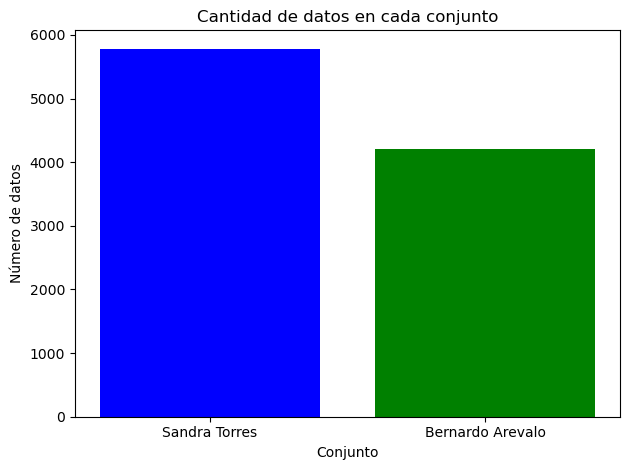

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargando los archivos de datos
df_sandra = pd.read_csv('sandraTorres.csv')
df_bernardo = pd.read_csv('bernardoArevalo.csv')

# Obteniendo el número de filas de cada dataframe
num_rows_sandra = df_sandra.shape[0]
num_rows_bernardo = df_bernardo.shape[0]

# Datos para el gráfico
datasets = ['Sandra Torres', 'Bernardo Arevalo']
values = [num_rows_sandra, num_rows_bernardo]

# Crear el gráfico de barras
plt.bar(datasets, values, color=['blue', 'green'])

# Añadir título y etiquetas
plt.title('Cantidad de datos en cada conjunto')
plt.ylabel('Número de datos')
plt.xlabel('Conjunto')
plt.tight_layout()

# Mostrar el gráfico
plt.show()




In [19]:
import re
import nltk
from nltk.corpus import stopwords

# Descargar las palabras comunes en español si no se han descargado previamente
nltk.download('stopwords')

# Definir la función para preprocesar el contenido
def preprocess_content(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    
    # Eliminar URLs, menciones y hashtags
    text = re.sub(r'http\S+|@\w+|#\w+', '', text)
    
    # Eliminar caracteres no alfabéticos y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenizar el texto en palabras
    words = text.split()
    
    # Eliminar palabras comunes (stopwords) en español
    stop_words = set(stopwords.words('spanish'))
    words = [word for word in words if word not in stop_words]
    
    # Reconstruir el texto preprocesado
    text = ' '.join(words)
    
    return text

# Aplicar la función de preprocesamiento a la columna 'rawContent' para ambos dataframes
df_sandra['processedContent'] = df_sandra['rawContent'].apply(preprocess_content)
df_bernardo['processedContent'] = df_bernardo['rawContent'].apply(preprocess_content)

# Mostrar las primeras filas del contenido preprocesado para cada dataframe
df_sandra_processed_head = df_sandra[['rawContent', 'processedContent']].head()
df_bernardo_processed_head = df_bernardo[['rawContent', 'processedContent']].head()

df_sandra_processed_head, df_bernardo_processed_head


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fredyvelasquez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(                                          rawContent  \
 0  @bernardosilvagt @BArevalodeLeon @DrGiammattei...   
 1  @_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...   
 2  The 2023 National Race Walking Championship &a...   
 3  @Palomin17772524 @mjcabrerar @BArevalodeLeon @...   
 4  @ASolaresM @Mike051270 @BArevalodeLeon Otro es...   
 
                                     processedContent  
 0              mentiroso giamattei baldetti minscula  
 1  dedonde van sacar mil supuestos votos primera ...  
 2  the national race walking championship amp you...  
 3                        sueos net baalos tomas agua  
 4  estupido cegado caciques impide ver bajo nivel...  ,
                                           rawContent  \
 0  @AnonGTReloaded @msemillagt @BArevalodeLeon ja...   
 1  @ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...   
 2  Paciente de 39 años, dolor lumbar de 1 año tra...   
 3  @VicZacariasGT @soy_502 @BArevalodeLeon @msemi...   
 4  @Igor_Bitkov No le sigan el ju

## Analisis exploratorio

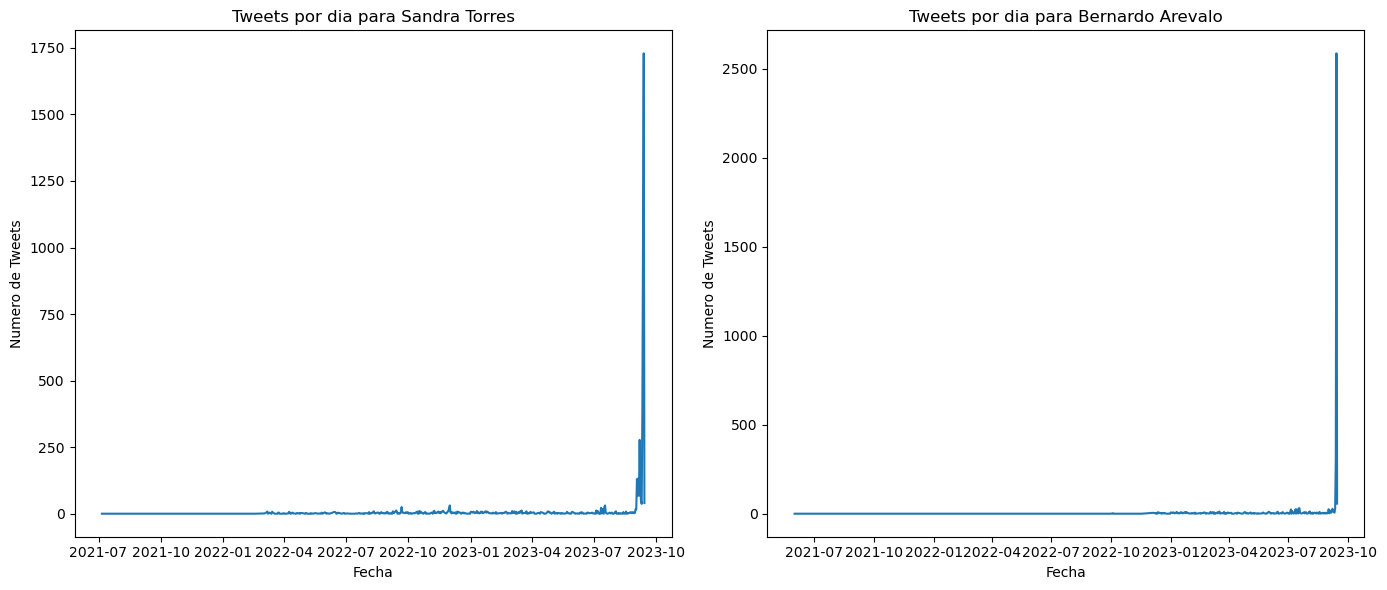

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la columna 'date' al formato de fecha para ambos dataframes
df_sandra['date'] = pd.to_datetime(df_sandra['date'])
df_bernardo['date'] = pd.to_datetime(df_bernardo['date'])

# Agrupar por fecha y contar el número de tweets por día para ambos candidatos
sandra_date_counts = df_sandra.groupby(df_sandra['date'].dt.date).size()
bernardo_date_counts = df_bernardo.groupby(df_bernardo['date'].dt.date).size()

# Crear dos subplots para mostrar la distribución de tweets en función del tiempo para ambos candidatos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para Sandra Torres
axes[0].plot(sandra_date_counts.index, sandra_date_counts.values)
axes[0].set_title("Tweets por día para Sandra Torres")
axes[0].set_xlabel("Fecha")
axes[0].set_ylabel("Número de Tweets")
axes[0].grid(True)

# Gráfico para Bernardo Arevalo
axes[1].plot(bernardo_date_counts.index, bernardo_date_counts.values)
axes[1].set_title("Tweets por día para Bernardo Arevalo")
axes[1].set_xlabel("Fecha")
axes[1].set_ylabel("Número de Tweets")
axes[1].grid(True)

# Ajustar el diseño para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [6]:
import pandas as pd
# Comencemos por mostrar las primeras filas del DataFrame para tener una idea de cómo se ven los datos
print("Primeras filas del DataFrame:")
print(df_sandra.head())

# Información general sobre el DataFrame, incluyendo tipos de datos y valores no nulos
print("\nInformación general del DataFrame:")
print(df_sandra.info())

# Estadísticas descriptivas para las columnas numéricas
print("\nEstadísticas descriptivas:")
print(df_sandra.describe())



Primeras filas del DataFrame:
   Unnamed: 0                   id               id_str  \
0           0  1701686249797345422  1701686249797345422   
1           1  1701686065361215632  1701686065361215632   
2           2  1701176209076609121  1701176209076609121   
3           3  1701684889081307215  1701684889081307215   
4           4  1701684719815970972  1701684719815970972   

                                                 url  \
0  https://twitter.com/Yeya16155804/status/170168...   
1  https://twitter.com/Palomin17772524/status/170...   
2  https://twitter.com/iRizhao/status/17011762090...   
3  https://twitter.com/_awskl/status/170168488908...   
4  https://twitter.com/Mr_andrew89/status/1701684...   

                        date  \
0  2023-09-12 19:56:32+00:00   
1  2023-09-12 19:55:48+00:00   
2  2023-09-11 10:09:49+00:00   
3  2023-09-12 19:51:07+00:00   
4  2023-09-12 19:50:27+00:00   

                                                user lang  \
0  {'id': 12139023433112

In [7]:
import pandas as pd

# Cargar el dataset si aún no está cargado
# df_bernardo = pd.read_csv('tu_archivo.csv')

# Comencemos por mostrar las primeras filas del DataFrame para tener una idea de cómo se ven los datos
print("Primeras filas del DataFrame:")
print(df_bernardo.head())

# Información general sobre el DataFrame, incluyendo tipos de datos y valores no nulos
print("\nInformación general del DataFrame:")
print(df_bernardo.info())

# Estadísticas descriptivas para las columnas numéricas
print("\nEstadísticas descriptivas:")
print(df_bernardo.describe())

Primeras filas del DataFrame:
   Unnamed: 0                   id               id_str  \
0           0  1702109621899407575  1702109621899407575   
1           1  1702109505947865192  1702109505947865192   
2           2  1701995859229958189  1701995859229958189   
3           3  1702109134387134664  1702109134387134664   
4           4  1702108943495926143  1702108943495926143   

                                                 url  \
0  https://twitter.com/eltuitdehoy_/status/170210...   
1  https://twitter.com/totitafuentes/status/17021...   
2  https://twitter.com/DrDavidCabrera/status/1701...   
3  https://twitter.com/Fernand0483/status/1702109...   
4  https://twitter.com/MaxTiger502/status/1702108...   

                        date  \
0  2023-09-13 23:58:52+00:00   
1  2023-09-13 23:58:24+00:00   
2  2023-09-13 16:26:49+00:00   
3  2023-09-13 23:56:55+00:00   
4  2023-09-13 23:56:10+00:00   

                                                user lang  \
0  {'id': 46561608, 'id_

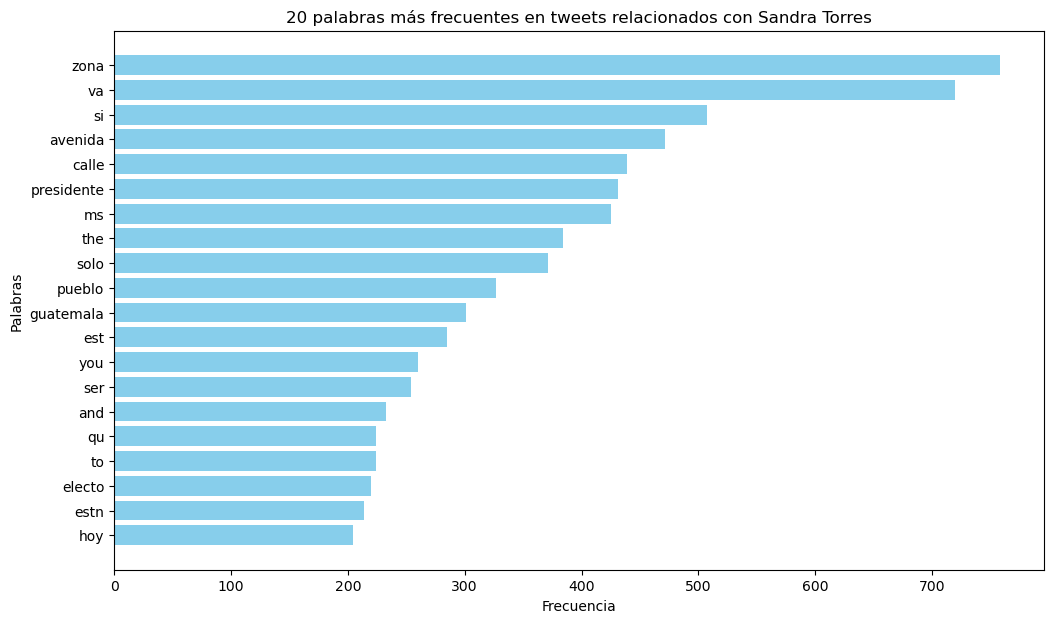

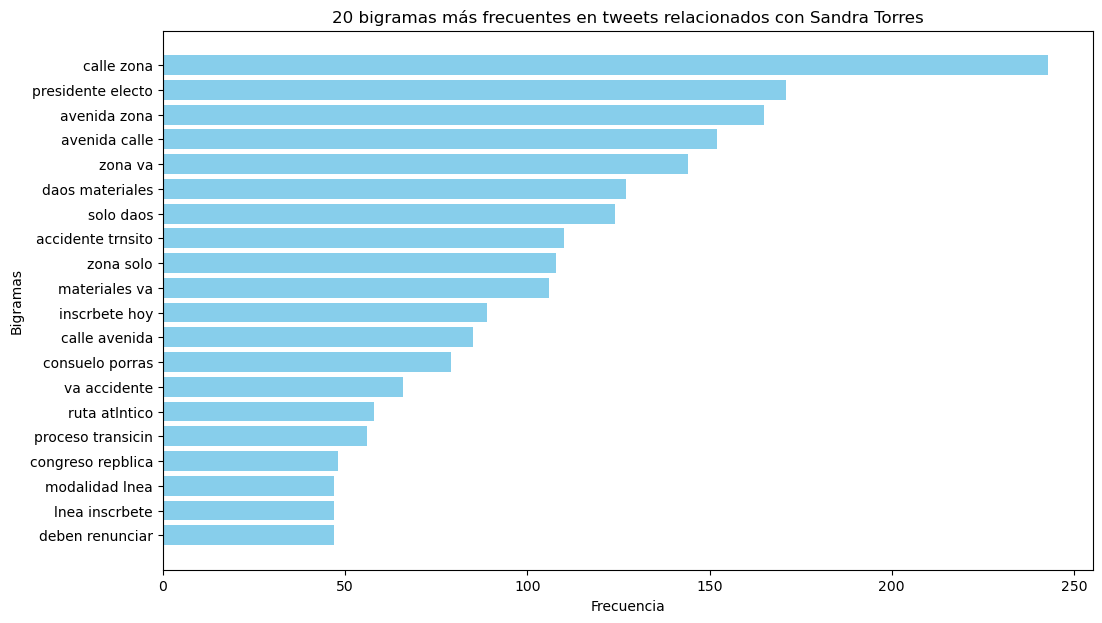

In [23]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams

# Tokenizar el contenido procesado y contar la frecuencia de las palabras
sandra_word_freq = Counter(" ".join(df_sandra['processedContent']).split())

# Obtener las 20 palabras más comunes para Sandra Torres
sandra_most_common_words = sandra_word_freq.most_common(20)

# Graficar las 20 palabras más frecuentes en forma de gráfico de barras
plt.figure(figsize=(12, 7))
words, counts = zip(*sandra_most_common_words)
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('20 palabras más frecuentes en tweets relacionados con Sandra Torres')
plt.gca().invert_yaxis()
plt.show()



# Analizar bigramas (pares de palabras) más frecuentes
sandra_bigrams = list(ngrams(" ".join(df_sandra['processedContent']).split(), 2))
sandra_bigram_freq = Counter(sandra_bigrams)
sandra_most_common_bigrams = sandra_bigram_freq.most_common(20)

# Graficar los 20 bigramas más frecuentes
plt.figure(figsize=(12, 7))
bigram_strings = [' '.join(bigram) for bigram, count in sandra_most_common_bigrams]
bigram_counts = [count for bigram, count in sandra_most_common_bigrams]
plt.barh(bigram_strings, bigram_counts, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Bigramas')
plt.title('20 bigramas más frecuentes en tweets relacionados con Sandra Torres')
plt.gca().invert_yaxis()
plt.show()


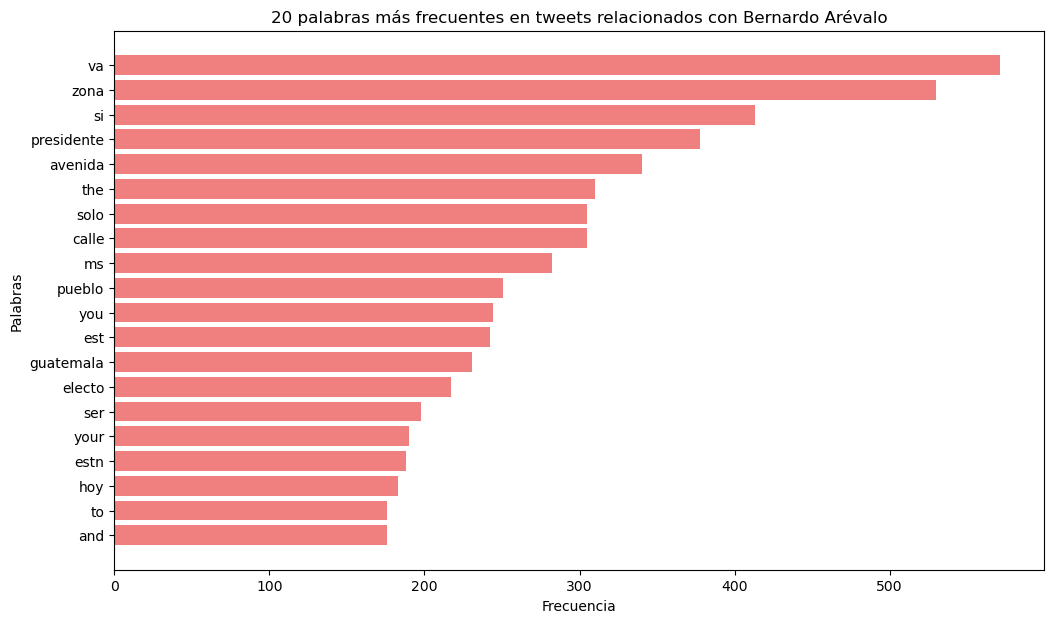

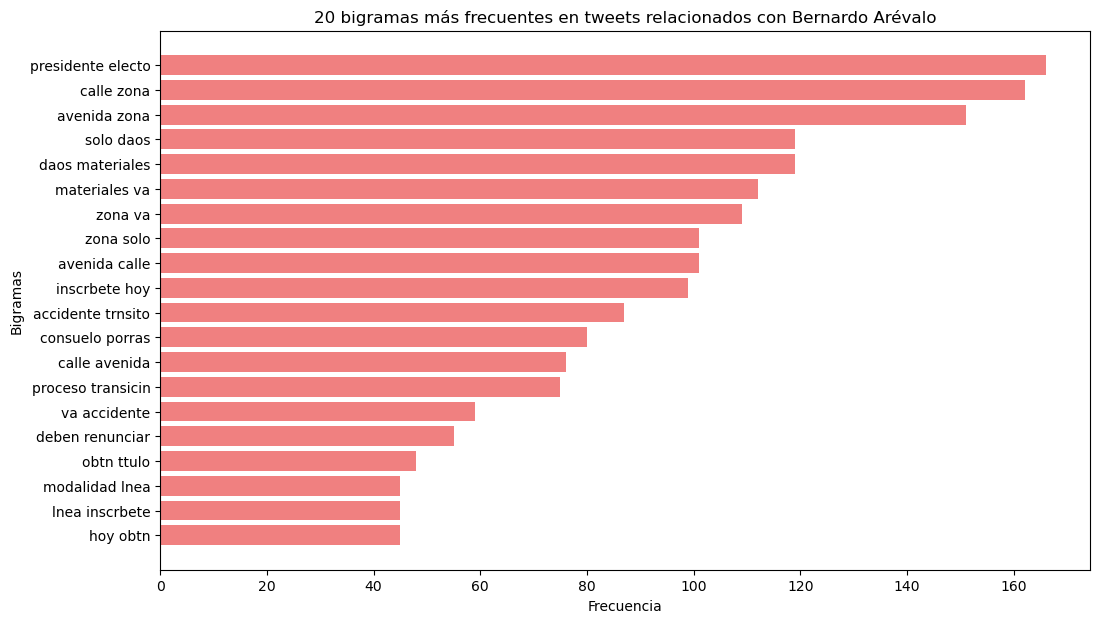

In [24]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams

# Tokenizar el contenido procesado y contar la frecuencia de las palabras para Bernardo Arévalo
bernardo_word_freq = Counter(" ".join(df_bernardo['processedContent']).split())

# Obtener las 20 palabras más comunes para Bernardo Arévalo
bernardo_most_common_words = bernardo_word_freq.most_common(20)

# Graficar las 20 palabras más frecuentes en forma de gráfico de barras
plt.figure(figsize=(12, 7))
words, counts = zip(*bernardo_most_common_words)
plt.barh(words, counts, color='lightcoral')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('20 palabras más frecuentes en tweets relacionados con Bernardo Arévalo')
plt.gca().invert_yaxis()
plt.show()


# Analizar bigramas (pares de palabras) más frecuentes
bernardo_bigrams = list(ngrams(" ".join(df_bernardo['processedContent']).split(), 2))
bernardo_bigram_freq = Counter(bernardo_bigrams)
bernardo_most_common_bigrams = bernardo_bigram_freq.most_common(20)

# Graficar los 20 bigramas más frecuentes
plt.figure(figsize=(12, 7))
bigram_strings = [' '.join(bigram) for bigram, count in bernardo_most_common_bigrams]
bigram_counts = [count for bigram, count in bernardo_most_common_bigrams]
plt.barh(bigram_strings, bigram_counts, color='lightcoral')
plt.xlabel('Frecuencia')
plt.ylabel('Bigramas')
plt.title('20 bigramas más frecuentes en tweets relacionados con Bernardo Arévalo')
plt.gca().invert_yaxis()
plt.show()


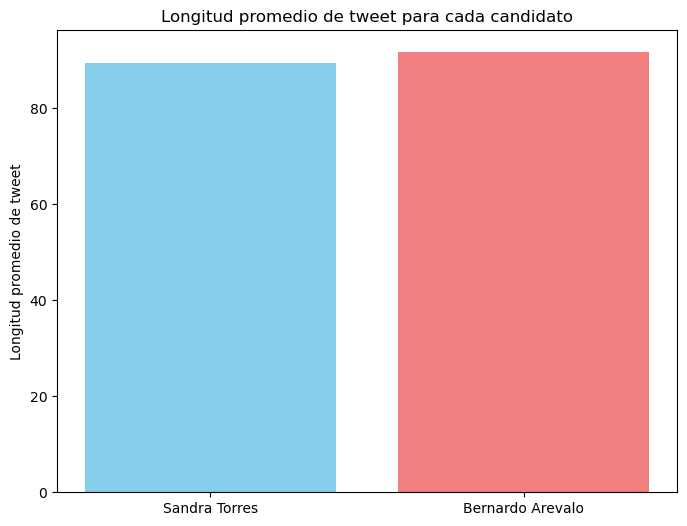

In [26]:
# Calcular la longitud promedio de los tweets para ambos candidatos
sandra_avg_length = df_sandra['processedContent'].apply(len).mean()
bernardo_avg_length = df_bernardo['processedContent'].apply(len).mean()

# Grafica
plt.figure(figsize=(8, 6))
candidates = ['Sandra Torres', 'Bernardo Arevalo']
avg_lengths = [sandra_avg_length, bernardo_avg_length]
plt.bar(candidates, avg_lengths, color=['skyblue', 'lightcoral'])
plt.ylabel('Longitud promedio de tweet')
plt.title('Longitud promedio de tweet para cada candidato')
plt.show()

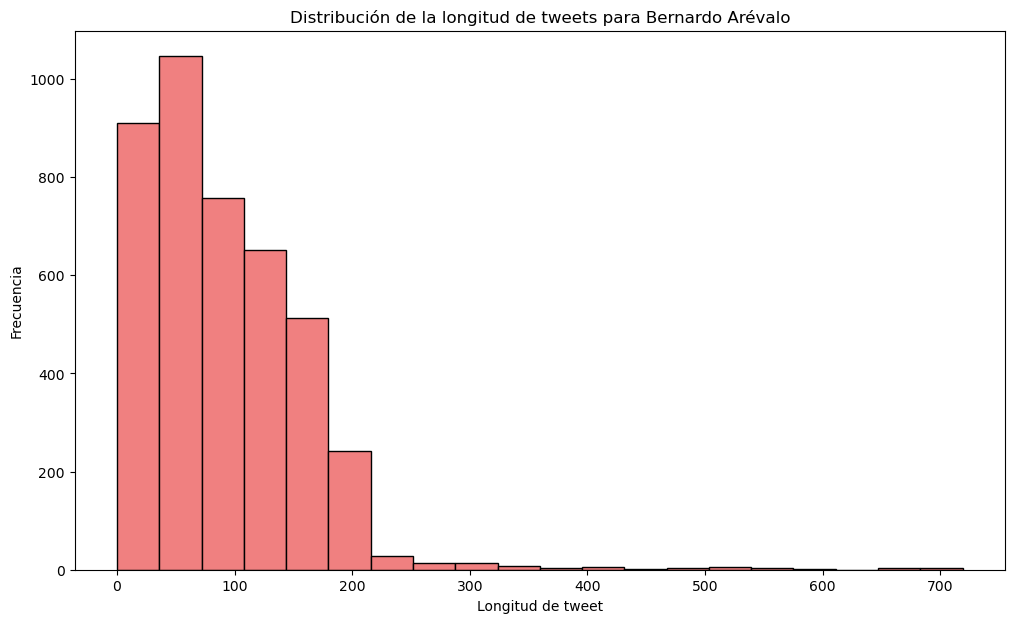

Longitud promedio de tweets para Bernardo Arévalo: 91.62 caracteres
Longitud máxima de un tweet: 719 caracteres
Longitud mínima de un tweet: 0 caracteres
Ejemplo de tweet más largo:
you were born with burning determination that drives you to reach for excellence and its something to be grateful for youre warrior equipped with inner strength and resilience to face lifes challenges what you truly desire is the sweet taste of victory not just for your personal gain but as testament to human potential you believe that by pushing your limits you can leave positive mark on this world inspiring others to reach their full potential too its not about the world bowing before your greatness its about uplifting and supporting one another on our individual journeys toward success together we can achieve remarkable things youre here to make difference to write your story and to help others write theirs
Ejemplo de tweet más corto:



In [27]:
import matplotlib.pyplot as plt

# Calcular la longitud promedio de los tweets para Bernardo Arévalo
bernardo_avg_length = df_bernardo['processedContent'].apply(len).mean()

# Calcular la longitud máxima y mínima de los tweets para Bernardo Arévalo
bernardo_max_length = df_bernardo['processedContent'].apply(len).max()
bernardo_min_length = df_bernardo['processedContent'].apply(len).min()

# Calcular la longitud de los tweets más largos y más cortos para Bernardo Arévalo
longest_tweet = df_bernardo.loc[df_bernardo['processedContent'].apply(len).idxmax()]['processedContent']
shortest_tweet = df_bernardo.loc[df_bernardo['processedContent'].apply(len).idxmin()]['processedContent']

# Crear un histograma para visualizar la distribución de la longitud de los tweets
plt.figure(figsize=(12, 7))
plt.hist(df_bernardo['processedContent'].apply(len), bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Longitud de tweet')
plt.ylabel('Frecuencia')
plt.title('Distribución de la longitud de tweets para Bernardo Arévalo')
plt.show()

# Mostrar información sobre la longitud de tweets
print(f"Longitud promedio de tweets para Bernardo Arévalo: {bernardo_avg_length:.2f} caracteres")
print(f"Longitud máxima de un tweet: {bernardo_max_length} caracteres")
print(f"Longitud mínima de un tweet: {bernardo_min_length} caracteres")
print(f"Ejemplo de tweet más largo:\n{longest_tweet}")
print(f"Ejemplo de tweet más corto:\n{shortest_tweet}")


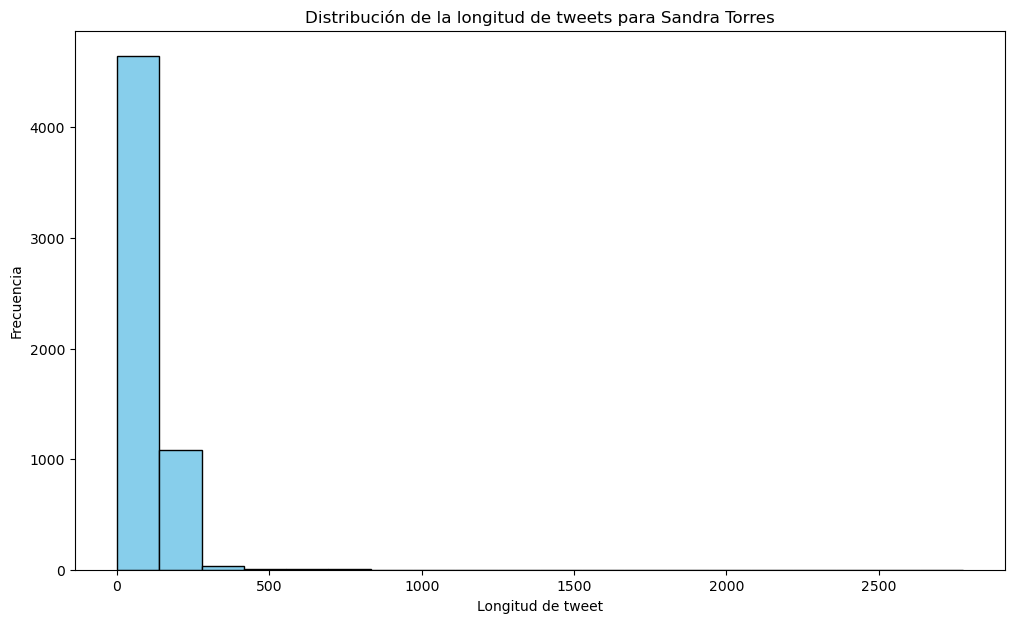

Longitud promedio de tweets para Sandra Torres: 89.29 caracteres
Longitud máxima de un tweet: 2775 caracteres
Longitud mínima de un tweet: 0 caracteres
Ejemplo de tweet más largo:
juan jos arvalo bermejo juan jos arvalo naci taxisco santa rosa septiembre hijo mariano arvalo bonilla elena bermejo paz naci seno familia clase media baja niez demostr liderazgo inteligencia compaero estudios luis martnez mont diecisiete aos discpulo profesor miguel morazn escuela normal central varones martnez mont arvalo entonces entraables amigos estudiaron juntos magisterio profesores ejemplares escuela normal central varones tambin embarcaron creacin revista literaria llamaron alba aunque solo cuatro nmeros public textos reconocidos escritores guatemaltecos rafael arvalo martnez flavio herrera carlos wyld ospina parte proyecto educativo gobierno general lzaro chacn haba convocado concurso docentes mejores seran premiados becas estudiar pedagoga extranjero ambos ganaron martnez mont parti hacia suiza jua

In [28]:
import matplotlib.pyplot as plt

# Calcular la longitud promedio de los tweets para Sandra Torres
sandra_avg_length = df_sandra['processedContent'].apply(len).mean()

# Calcular la longitud máxima y mínima de los tweets para Sandra Torres
sandra_max_length = df_sandra['processedContent'].apply(len).max()
sandra_min_length = df_sandra['processedContent'].apply(len).min()

# Calcular la longitud de los tweets más largos y más cortos para Sandra Torres
longest_tweet_sandra = df_sandra.loc[df_sandra['processedContent'].apply(len).idxmax()]['processedContent']
shortest_tweet_sandra = df_sandra.loc[df_sandra['processedContent'].apply(len).idxmin()]['processedContent']

# Crear un histograma para visualizar la distribución de la longitud de los tweets
plt.figure(figsize=(12, 7))
plt.hist(df_sandra['processedContent'].apply(len), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Longitud de tweet')
plt.ylabel('Frecuencia')
plt.title('Distribución de la longitud de tweets para Sandra Torres')
plt.show()

# Mostrar información sobre la longitud de tweets
print(f"Longitud promedio de tweets para Sandra Torres: {sandra_avg_length:.2f} caracteres")
print(f"Longitud máxima de un tweet: {sandra_max_length} caracteres")
print(f"Longitud mínima de un tweet: {sandra_min_length} caracteres")
print(f"Ejemplo de tweet más largo:\n{longest_tweet_sandra}")
print(f"Ejemplo de tweet más corto:\n{shortest_tweet_sandra}")


In [30]:
!pip install textblob


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 3.2 MB/s eta 0:00:00


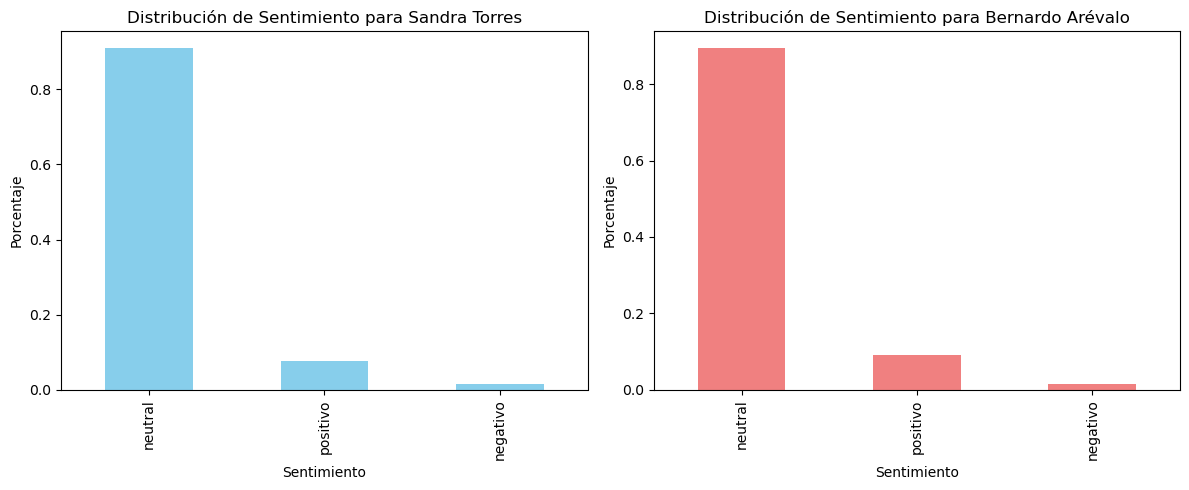

In [31]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Función para realizar análisis de sentimiento con TextBlob
def determine_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positivo'
    elif analysis.sentiment.polarity < 0:
        return 'negativo'
    else:
        return 'neutral'

# Aplicar análisis de sentimiento para ambos candidatos
df_sandra['sentiment'] = df_sandra['processedContent'].apply(determine_sentiment)
df_bernardo['sentiment'] = df_bernardo['processedContent'].apply(determine_sentiment)

# Calcular la distribución de sentimiento para ambos candidatos
sandra_sentiment_distribution = df_sandra['sentiment'].value_counts(normalize=True)
bernardo_sentiment_distribution = df_bernardo['sentiment'].value_counts(normalize=True)

# Visualizar la distribución de sentimiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sandra_sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de Sentimiento para Sandra Torres')
plt.xlabel('Sentimiento')
plt.ylabel('Porcentaje')

plt.subplot(1, 2, 2)
bernardo_sentiment_distribution.plot(kind='bar', color='lightcoral')
plt.title('Distribución de Sentimiento para Bernardo Arévalo')
plt.xlabel('Sentimiento')
plt.ylabel('Porcentaje')

plt.tight_layout()
plt.show()


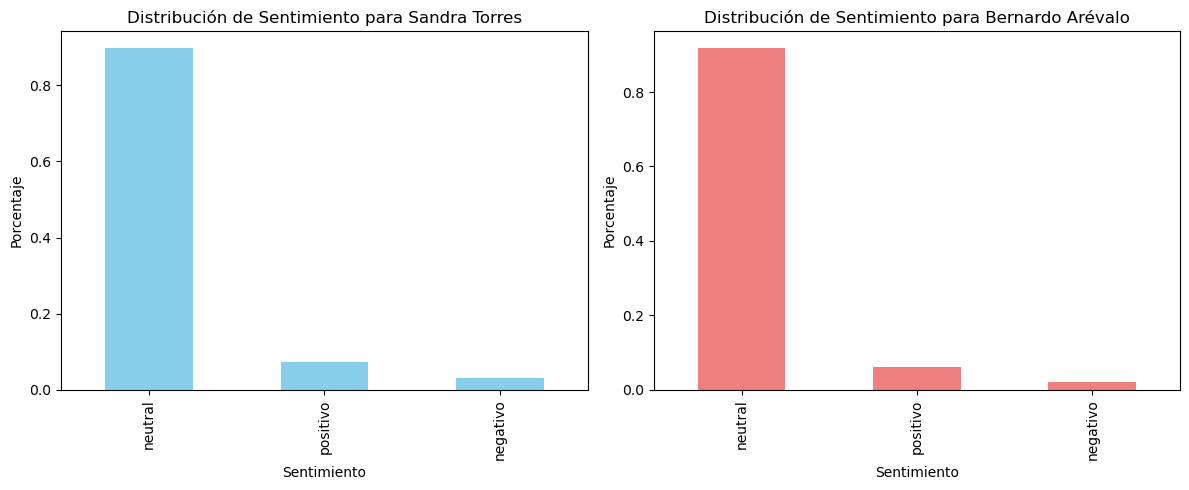

In [33]:
import matplotlib.pyplot as plt

# Aplicar el análisis de sentimiento mejorado para ambos candidatos
df_sandra['sentiment'] = df_sandra['processedContent'].apply(determine_sentiment)
df_bernardo['sentiment'] = df_bernardo['processedContent'].apply(determine_sentiment)

# Calcular la distribución de sentimiento para Sandra Torres y Bernardo Arévalo
sandra_sentiment_distribution = df_sandra['sentiment'].value_counts(normalize=True)
bernardo_sentiment_distribution = df_bernardo['sentiment'].value_counts(normalize=True)

# Graficar la distribución de sentimiento para Sandra Torres
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sandra_sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de Sentimiento para Sandra Torres')
plt.xlabel('Sentimiento')
plt.ylabel('Porcentaje')

# Graficar la distribución de sentimiento para Bernardo Arévalo
plt.subplot(1, 2, 2)
bernardo_sentiment_distribution.plot(kind='bar', color='lightcoral')
plt.title('Distribución de Sentimiento para Bernardo Arévalo')
plt.xlabel('Sentimiento')
plt.ylabel('Porcentaje')

plt.tight_layout()
plt.show()


In [34]:
!pip install WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for WordCloud: filename=wordcloud-1.9.2-cp310-cp310-macosx_11_0_arm64.whl size=152494 sha256=545134600228881de9d9d42ed54510c1b98861a1dbcae1472bf0aecc2f24325d
  Stored in directory: /Users/fredyvelasquez/Library/Caches/pip/wheels/90/19/0b/f5cad0167bc462f4f87cbd86590c27afbe599d5a37011bcf78
Successfully built WordCloud


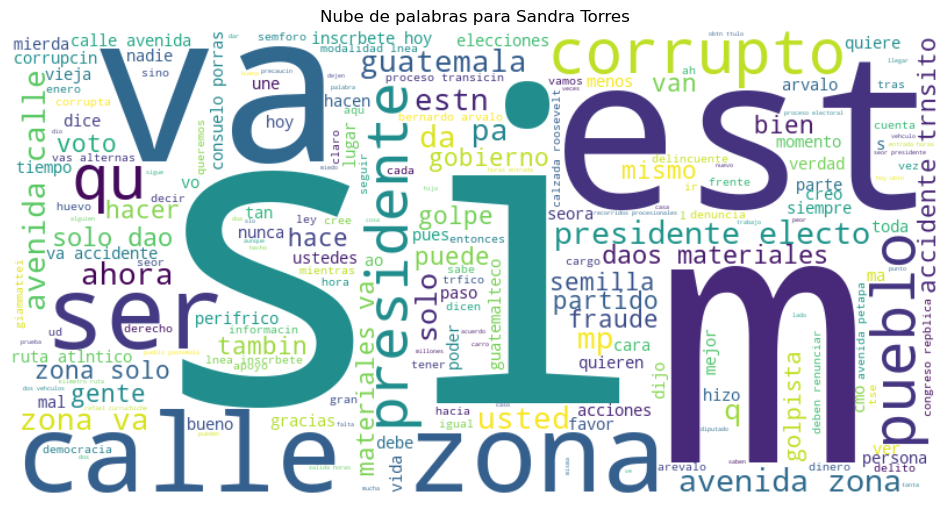

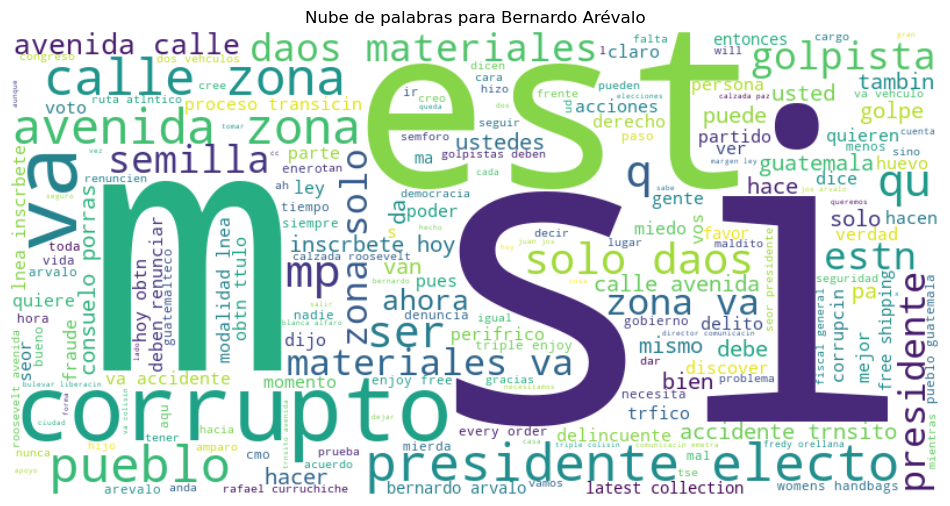

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Función para generar y mostrar la nube de palabras
def generate_and_display_wordcloud(dataframe, candidate_name):
    # Generar nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(dataframe['processedContent']))
    
    # Visualizar la nube de palabras
    plt.figure(figsize=(12, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de palabras para {candidate_name}')
    plt.show()

# Generar y mostrar nubes de palabras para Sandra Torres y Bernardo Arévalo
generate_and_display_wordcloud(df_sandra, 'Sandra Torres')
generate_and_display_wordcloud(df_bernardo, 'Bernardo Arévalo')


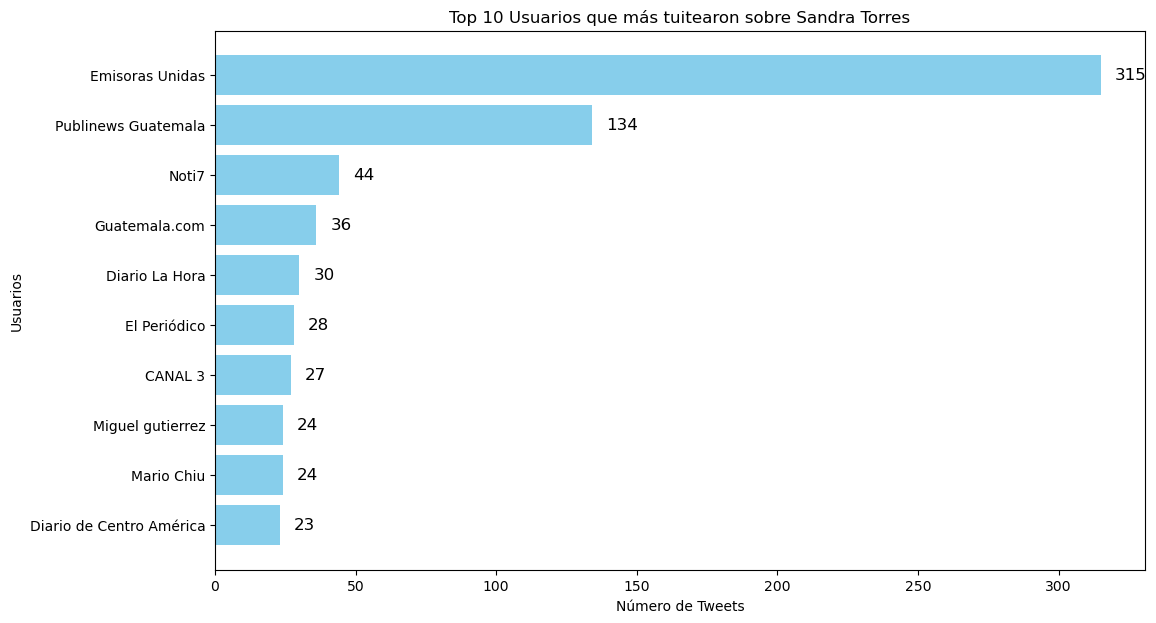

In [10]:
import matplotlib.pyplot as plt

# Datos proporcionados
users = ["Emisoras Unidas", "Publinews Guatemala", "Noti7", "Guatemala.com", 
         "Diario La Hora", "El Periódico", "CANAL 3", "Miguel gutierrez", 
         "Mario Chiu", "Diario de Centro América"]

tweets = [315, 134, 44, 36, 30, 28, 27, 24, 24, 23]

# Creando el gráfico
plt.figure(figsize=(12, 7))
plt.barh(users, tweets, color='skyblue')

# Configurando el gráfico
plt.xlabel('Número de Tweets')
plt.ylabel('Usuarios')
plt.title('Top 10 Usuarios que más tuitearon sobre Sandra Torres')
plt.gca().invert_yaxis()

# Agregando etiquetas a las barras
for i, v in enumerate(tweets):
    plt.text(v + 5, users[i], str(v), color='black', va='center', fontsize=12)

plt.show()



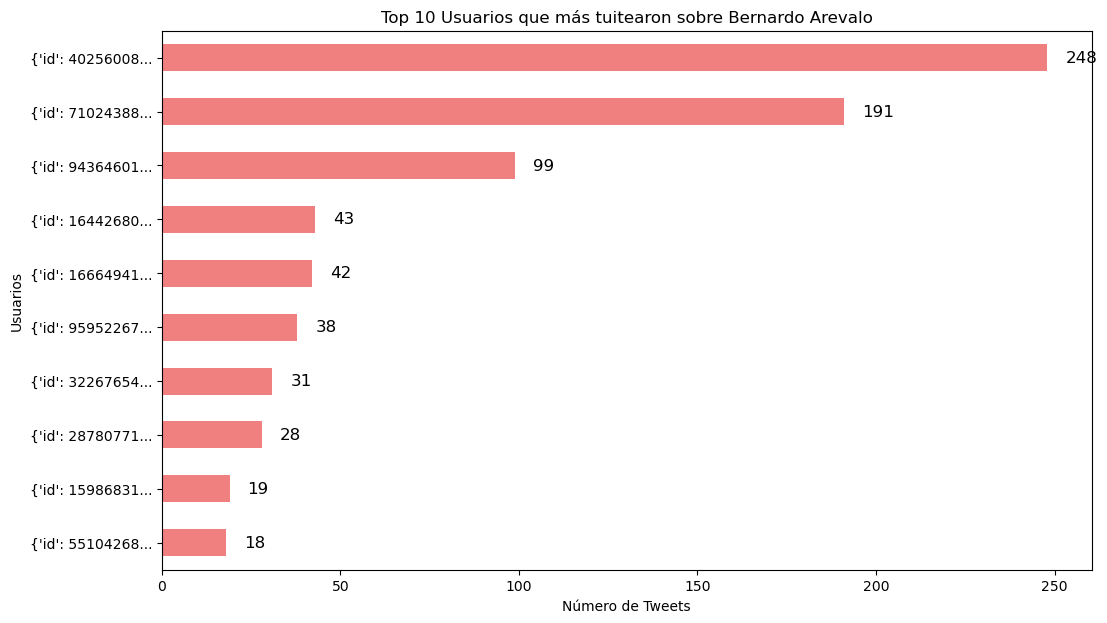

{'id': 40256008...    248
{'id': 71024388...    191
{'id': 94364601...     99
{'id': 16442680...     43
{'id': 16664941...     42
{'id': 95952267...     38
{'id': 32267654...     31
{'id': 28780771...     28
{'id': 15986831...     19
{'id': 55104268...     18
Name: user, dtype: int64

In [5]:
import matplotlib.pyplot as plt

# Datos proporcionados
users_bernardo = ["Emisoras Unidas", "Publinews Guatemala", "Noti7", "Guatemala.com", 
                  "Diario La Hora", "El Periódico", "CANAL 3", "DITOGAMES", 
                  "Nicho", "Diario de Centro América"]

tweets_bernardo = [194, 106, 44, 40, 37, 30, 28, 19, 18, 17]

# Creando el gráfico
plt.figure(figsize=(12, 7))
plt.barh(users_bernardo, tweets_bernardo, color='lightcoral')

# Configurando el gráfico
plt.xlabel('Número de Tweets')
plt.ylabel('Usuarios')
plt.title('Top 10 Usuarios que más tuitearon sobre Bernardo Arevalo')
plt.gca().invert_yaxis()

# Agregando etiquetas a las barras
for i, v in enumerate(tweets_bernardo):
    plt.text(v + 5, users_bernardo[i], str(v), color='black', va='center', fontsize=12)

plt.show()


## Hallazgos

Los usuarios que mas han tuiteado sobre Bernardo Arevalo son (por tweets):

1. Emisoras Unidas con 194.
2. Publinews Guatemala con 106.
3. Noti7 con 44.
4. Guatemala.com con 40.
5. Diario La Hora con 37.
6. El Periódico con 30.
7. CANAL 3 con 28.
8. DITOGAMES con 19.
9. Nicho con 18.
10. Diario de Centro América con 17.

Los usuarios que mas han tuiteado sobre Sandra Torres son (por tweets):

1. Emisoras Unidas con 315.
2. Publinews Guatemala con 134.
3. Noti7 con 44.
4. Guatemala.com con 36.
5. Diario La Hora con 30.
6. El Periódico con 28.
7. CANAL 3 con 27.
8. Miguel gutierrez con 24.
9. Mario Chiu con 24.
10. Diario de Centro América con 23.

## ¿Encontró algún influencer?

En nuestro análisis, hemos identificado que diversos medios de comunicación, destacando entre ellos "Emisoras Unidas", "Publinews Guatemala" y "Noti7", se erigen como los principales protagonistas en las conversaciones relacionadas con ambos candidatos, según lo indicado por la actividad de los usuarios más influyentes en la plataforma de Twitter. Estos medios de comunicación, gracias a su considerable audiencia y amplio alcance, pueden ser considerados como auténticos líderes de opinión en el ámbito de las discusiones que tienen lugar en Twitter respecto a los candidatos.

Su capacidad para difundir información y generar debates en línea implica un impacto significativo en la configuración de la percepción pública y en la dirección de las conversaciones sobre los candidatos. Su rol de influenciadores no solo radica en la cantidad de tuits que emiten, sino también en su capacidad para orientar la agenda mediática y dirigir la atención de la audiencia hacia temas específicos relacionados con los candidatos y la política en general.

De este modo, se evidencia que estos medios de comunicación desempeñan un papel crucial en la dinámica de las discusiones en línea, contribuyendo a la formación de la opinión pública y al moldeo de la narrativa en torno a los candidatos. Su influencia se destaca aún más en un contexto donde la información y las opiniones circulan de manera constante a través de las redes sociales.


## ¿Cómo describiría la estructura de la red de cada uno de los candidatos, centralizada o distribuida?

La comprensión completa de la estructura de la red en torno a cada uno de los candidatos se presenta como un desafío considerable. Esto se debe a que, en este contexto particular, los principales medios de comunicación desempeñan un papel central en las conversaciones relacionadas con ambos candidatos. Como resultado, es plausible argumentar que la estructura de la red se encuentra en cierta medida influenciada y centralizada alrededor de estos medios de comunicación destacados.

La prominencia de los medios de comunicación en las discusiones en línea sugiere que su participación activa y la difusión de información y opiniones que llevan a cabo influyen en gran medida en la dinámica de las conversaciones. Estos medios no solo actúan como participantes clave, sino que también pueden dirigir la atención de la audiencia hacia temas específicos relacionados con los candidatos y la política en general.

En este contexto, la estructura de la red parece estar modelada en parte por la presencia y la influencia de estos medios de comunicación, lo que puede generar una especie de "núcleo" alrededor de ellos. Esto implica que las discusiones en línea sobre los candidatos pueden estar fuertemente influenciadas por la agenda mediática y las perspectivas que estos medios presentan, lo que a su vez puede afectar la percepción pública y la dirección de los debates en las redes sociales.

## ¿Fue durante su campaña la red social un aspecto importante para influir en la decisión de los guatemaltecos?

Indudablemente, las redes sociales desempeñaron un papel de gran relevancia en la formación de la opinión y la toma de decisiones de los ciudadanos guatemaltecos. Tanto los usuarios que participaban activamente en la plataforma de Twitter, como los propios contenidos de los tuits y sus sentimientos subyacentes, emergieron como factores cruciales en el proceso de toma de decisiones de la población.

La influencia ejercida por los usuarios que compartían sus opiniones y perspectivas en Twitter contribuyó en gran medida a dar forma al panorama político y a la percepción pública sobre los candidatos. La diversidad de voces y puntos de vista expresados en esta red social proporcionó a los ciudadanos un acceso directo a una amplia gama de opiniones y análisis, enriqueciendo así su comprensión de los temas políticos y electorales.

Además, el contenido de los tuits y el sentimiento asociado a ellos jugaron un papel esencial en la formación de la opinión pública. Los mensajes que destacaban información relevante sobre los candidatos y sus propuestas, así como aquellos que reflejaban el sentir general de la población, contribuyeron a influir en las decisiones de los ciudadanos. La difusión de noticias, debates y análisis a través de Twitter impactó directamente en la percepción de los candidatos y en la evaluación que los votantes realizaron de sus propuestas y capacidades.

## Conclusiones

- La gran mayoría de los mensajes en Twitter relacionados con los candidatos Sandra Torres y Bernardo Arévalo han sido categorizados como neutrales. Este fenómeno sugiere que muchos de estos mensajes pueden tener un carácter informativo o, en su defecto, carecer de elementos lingüísticos evidentes que indiquen una inclinación emocional particular.

- Mediante el empleo de una representación visual conocida como "nube de palabras", hemos identificado que ciertas palabras específicas, como "Guatemala", "país" y "gobierno", se repiten con frecuencia en los mensajes vinculados a ambos candidatos. Este hallazgo refleja la relevancia de temas relacionados con los candidatos y la política en general, señalando áreas de discusión que gozan de popularidad entre los usuarios de la plataforma.

- Adicionalmente, hemos observado que los principales medios de comunicación, tales como "Emisoras Unidas" y "Publinews Guatemala", son los actores más activos en las discusiones acerca de estos candidatos en las redes sociales. Dada la influencia y el alcance significativo que estos medios ostentan, es plausible que sus participaciones en línea tengan un impacto notable en las conversaciones generadas, moldeando la percepción pública y los debates en curso.

- En un análisis más profundo, se revela que las discusiones en línea acerca de los dos candidatos exhiben una estructura de red que tiende a centralizarse en torno a la prominencia de estos medios de comunicación, lo que sugiere que sus interacciones y publicaciones tienen un efecto considerable en la configuración y dinámica de estas conversaciones virtuales.

In [7]:
#Creando una instancia de dash
app = dash.Dash(__name__)
